In [1]:
import numpy as np
import cv2
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam,SGD
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

In [2]:
# Reading images from RAVDESS dataset
data_dir = 'rav'
img_size = (64,64)

train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.1)
val_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.1)

train_generator = train_datagen.flow_from_directory(
        data_dir,
        target_size=img_size,
        batch_size=64,
        subset='training',
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        data_dir,
        target_size=img_size,
        batch_size=64,
        subset='validation',
        color_mode="grayscale",
        class_mode='categorical')

Found 11575 images belonging to 5 classes.
Found 1284 images belonging to 5 classes.


In [3]:
# # Reading images from FER-2013 dataset
# train_dir = 'fer/train'
# val_dir = 'fer/test'
# img_size = (48,48)

# train_datagen = ImageDataGenerator(rescale=1./255)
# val_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#         train_dir,
#         target_size=img_size,
#         batch_size=64,
#         color_mode="grayscale",
#         class_mode='categorical')

# validation_generator = val_datagen.flow_from_directory(
#         val_dir,
#         target_size=img_size,
#         batch_size=64,
#         color_mode="grayscale",
#         class_mode='categorical')

In [4]:
num_classes = len(train_generator.class_indices);

In [5]:
print("Class labels",train_generator.class_indices)

Class labels {'angry': 0, 'calm': 1, 'fearful': 2, 'happy': 3, 'sad': 4}


In [6]:
# defining the model
def get_model1(num_class,img_size):
    input_size = img_size + (1,)
    emotion_model = Sequential()

    emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_size))
    emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
    emotion_model.add(Dropout(0.25))

    emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
    emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
    emotion_model.add(Dropout(0.5))

    emotion_model.add(Flatten())
    emotion_model.add(Dense(1024, activation='relu'))
    emotion_model.add(Dropout(0.5))
    emotion_model.add(Dense(num_class, activation='softmax'))

    emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001, decay=1e-6),
                          metrics=['accuracy'])
    return emotion_model

In [7]:
# defining the model
def get_model2(num_class,img_size):
    input_size = img_size + (1,)
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=input_size))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(num_class, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [8]:
# get the model
emotion_model = get_model2(num_classes,img_size);
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0

In [9]:
# train the model and store training info
emotion_model_info = emotion_model.fit(
        train_generator,
        steps_per_epoch=11575 // 64,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=1284 // 64,
        shuffle=True)

Epoch 1/100
180/180 [==============================] - 9s 33ms/step - loss: 1.6613 - accuracy: 0.2089 - val_loss: 1.6085 - val_accuracy: 0.2195
Epoch 2/100
180/180 [==============================] - 5s 27ms/step - loss: 1.6080 - accuracy: 0.2148 - val_loss: 1.6077 - val_accuracy: 0.2164
Epoch 3/100
180/180 [==============================] - 5s 26ms/step - loss: 1.6038 - accuracy: 0.2297 - val_loss: 1.6013 - val_accuracy: 0.2516
Epoch 4/100
180/180 [==============================] - 5s 26ms/step - loss: 1.5750 - accuracy: 0.2723 - val_loss: 1.5309 - val_accuracy: 0.3570
Epoch 5/100
180/180 [==============================] - 5s 26ms/step - loss: 1.4162 - accuracy: 0.3743 - val_loss: 1.4502 - val_accuracy: 0.3344
Epoch 6/100
180/180 [==============================] - 5s 27ms/step - loss: 1.2981 - accuracy: 0.4305 - val_loss: 1.5357 - val_accuracy: 0.3352
Epoch 7/100
180/180 [==============================] - 5s 27ms/step - loss: 1.2464 - accuracy: 0.4580 - val_loss: 1.5355 - val_accuracy:

180/180 [==============================] - 6s 35ms/step - loss: 0.2756 - accuracy: 0.8984 - val_loss: 1.6076 - val_accuracy: 0.6508
Epoch 58/100
180/180 [==============================] - 6s 34ms/step - loss: 0.2818 - accuracy: 0.8969 - val_loss: 1.3390 - val_accuracy: 0.6867
Epoch 59/100
180/180 [==============================] - 6s 33ms/step - loss: 0.2794 - accuracy: 0.8982 - val_loss: 1.4042 - val_accuracy: 0.6742
Epoch 60/100
180/180 [==============================] - 6s 35ms/step - loss: 0.2719 - accuracy: 0.8986 - val_loss: 1.5112 - val_accuracy: 0.6453
Epoch 61/100
180/180 [==============================] - 6s 35ms/step - loss: 0.2576 - accuracy: 0.9055 - val_loss: 1.5102 - val_accuracy: 0.6578
Epoch 62/100
180/180 [==============================] - 6s 35ms/step - loss: 0.2626 - accuracy: 0.9059 - val_loss: 1.4049 - val_accuracy: 0.6977
Epoch 63/100
180/180 [==============================] - 6s 34ms/step - loss: 0.2601 - accuracy: 0.9062 - val_loss: 1.5324 - val_accuracy: 0.668

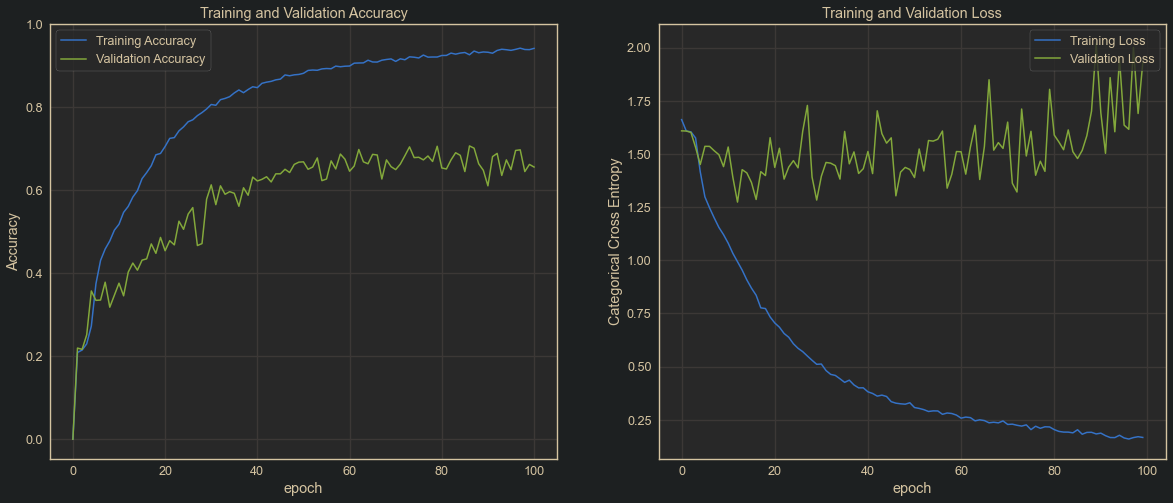

In [10]:
# VISUALISING ACCURACY AND LOSS VS ITERATIONS
acc = [0.] + emotion_model_info.history['accuracy']
val_acc = [0.] + emotion_model_info.history['val_accuracy']
loss = emotion_model_info.history['loss']
val_loss = emotion_model_info.history['val_loss']
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Categorical Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [12]:
# store trained weights
emotion_model.save_weights('weights_rav2.h5')